<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Weighted-Median-Filter" data-toc-modified-id="Weighted-Median-Filter-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Weighted Median Filter</a></span></li></ul></div>

## Weighted Median Filter

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('images/plane_noisy.png', cv2.IMREAD_GRAYSCALE)
img_out = img.copy()
print(img.dtype)
height = img.shape[0]
width = img.shape[1]
print('height=',height,'width = ',width)

uint8
height= 391 width =  583


In [3]:
height = img.shape[0]
width = img.shape[1]

weights = np.array(
        [[0, 0, 1, 2, 1, 0, 0],
        [0, 1, 2, 3, 2, 1, 0],
        [1, 2, 3, 4, 3, 2, 1],
        [2, 3, 4, 5, 4, 3, 2],
        [1, 2, 3, 4, 3, 2, 1],
        [0, 1, 2, 3, 2, 1, 0],
        [0, 0, 1, 2, 1, 0, 0]])

M = int((weights.sum() - 1) / 2)

for i in np.arange(3, height-3):
    for j in np.arange(3, width-3):
        neighbors = []
        for k in np.arange(-3, 4):
            for l in np.arange(-3, 4):
                a = img.item(i+k, j+l)
                w = weights[k+3, l+3]
                for _ in np.arange(w):
                    neighbors.append(a)
        neighbors.sort()
        median = neighbors[M]
        b = median
        img_out.itemset((i,j), b)

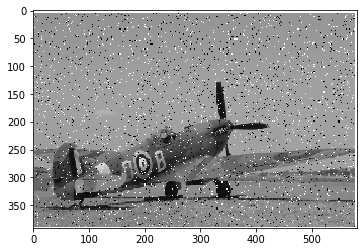

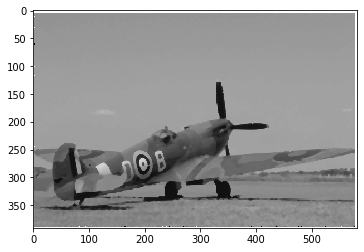

In [4]:
#cv2.imwrite('images/filter_WeightedMedian.jpg', img_out)

plt.figure()
plt.imshow(img,'gray')
plt.figure()
plt.imshow(img_out,'gray')
plt.show()